In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import matthews_corrcoef

%matplotlib widget

In [2]:
seed = 1
testsize = "0.33"
datapath = "/Users/kassand/astro/PlanetMigration_ML/training_data/"

ylabel = "flag"

df_train = pd.read_pickle(datapath + "train_data_seed_" + str(seed) + "_testsize_0.33.pkl")
df_test = pd.read_pickle(datapath + "test_data_seed_" + str(seed) + "_testsize_0.33.pkl")

model_list = ["LR", "KNN", "SVC", "RF"]
modpath = "/Users/kassand/astro/PlanetMigration_ML/tuned_models/model_exploration/"

In [9]:
def get_scores(path, scaler, resampler, model_list):
    
    """ Loads the previously-trained models and calculates and returns the train/test scores """

    scorelist_train = []
    scorelist_test = []

    for m in model_list:
        fname = path + m + "_" + scaler + "_" + resampler + "_seed_" + str(seed) + "_testsize_" + testsize + "_cv_nsplits_5.pkl"
        
        with open(fname, 'rb') as file:
            model = pickle.load(file)
            
        print("Loading model \n",model)

        feature_names = list(model.feature_names_in_)

        X_train, y_train = df_train[feature_names], df_train[ylabel]
        X_test, y_test = df_test[feature_names], df_test[ylabel]

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        mscore_train = matthews_corrcoef(y_train, y_train_pred)
        mscore_test = matthews_corrcoef(y_test, y_test_pred)
        print("Test score: ", mscore_test)

        scorelist_train.append(mscore_train)
        scorelist_test.append(mscore_test)
        print("--------------------------")
        
    return scorelist_train, scorelist_test

In [10]:
score_train_SS_smote, score_test_SS_smote = get_scores(modpath, "standardscaler", "smote", model_list)
score_train_MMS_smote, score_test_MMS_smote = get_scores(modpath, "minmaxscaler", "smote", model_list)

score_train_SS_smoteenn, score_test_SS_smoteenn = get_scores(modpath, "standardscaler", "smoteenn", model_list)
score_train_MMS_smoteenn, score_test_MMS_smoteenn = get_scores(modpath, "minmaxscaler", "smoteenn", model_list)

Loading model 
 Pipeline(steps=[('scaler', StandardScaler()),
                ('resampler', SMOTE(random_state=1)),
                ('LR',
                 LogisticRegression(C=74.6528346269155, penalty='l1',
                                    random_state=1, solver='liblinear'))])
Test score:  0.8102993713910533
--------------------------
Loading model 
 Pipeline(steps=[('scaler', StandardScaler()),
                ('resampler', SMOTE(random_state=1)),
                ('KNN', KNeighborsClassifier(n_neighbors=4))])
Test score:  0.8768088025080226
--------------------------
Loading model 
 Pipeline(steps=[('scaler', StandardScaler()),
                ('resampler', SMOTE(random_state=1)),
                ('SVC',
                 SVC(C=43.09054751874309, gamma=0.14943646773788358,
                     max_iter=1000, probability=True, random_state=1))])
Test score:  0.9492609331520866
--------------------------
Loading model 
 Pipeline(steps=[('scaler', StandardScaler()),
                

/var/folders/qj/hkpybh_n2gb8yqdc6llmlmg00000gn/T/ipykernel_21678/3582247241.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1,1,1)


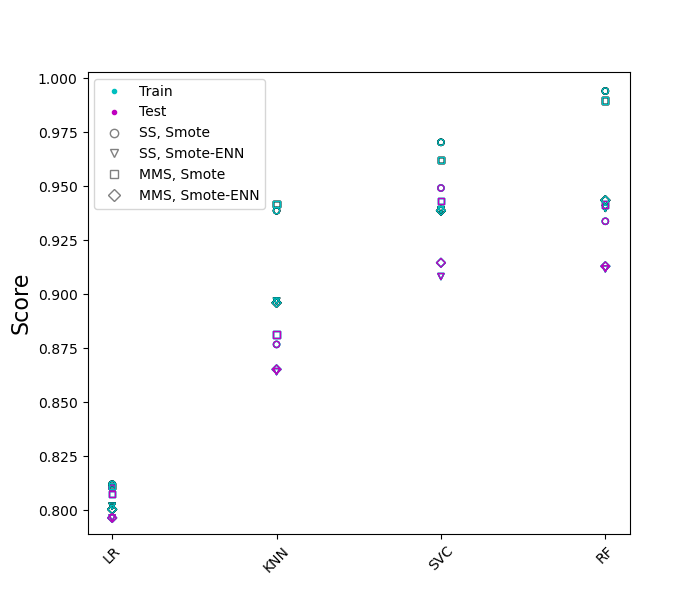

In [12]:
import matplotlib.lines as mlines
from IPython.display import display, clear_output
clear_output()

c1, c2 = 'c', 'm'

plt.figure(1, figsize = (7,6))
ax = plt.subplot(1,1,1)
ax.scatter(model_list, score_train_SS_smote, s = 20, facecolors='none', edgecolors=c1, marker = 'o')
ax.scatter(model_list, score_test_SS_smote, s = 20, facecolors='none', edgecolors=c2, marker = 'o')

ax.scatter(model_list, score_train_SS_smoteenn, s = 20, facecolors='none', edgecolors=c1, marker = 'v')
ax.scatter(model_list, score_test_SS_smoteenn, s = 20, facecolors='none', edgecolors=c2, marker = 'v')


ax.scatter(model_list, score_train_MMS_smote, s = 20, facecolors='none', edgecolors=c1, marker = 's')
ax.scatter(model_list, score_test_MMS_smote, s = 20, facecolors='none', edgecolors=c2, marker = 's')

ax.scatter(model_list, score_train_MMS_smoteenn, s = 20, facecolors='none', edgecolors=c1, marker = 'D')
ax.scatter(model_list, score_test_MMS_smoteenn, s = 20, facecolors='none', edgecolors=c2, marker = 'D')

l1 = mlines.Line2D([], [], color=c1, marker='.', ls='', label='Train')
l2 = mlines.Line2D([], [], color=c2, marker='.', ls='', label='Test')
l3 = mlines.Line2D([], [], mec='grey',mfc='w', marker='o', ls='', label='SS, Smote')
l4 = mlines.Line2D([], [], mec='grey',mfc='w', marker='v', ls='', label='SS, Smote-ENN')
l5 = mlines.Line2D([], [], mec='grey',mfc='w', marker='s', ls='', label='MMS, Smote')
l6 = mlines.Line2D([], [], mec='grey',mfc='w', marker='D', ls='', label='MMS, Smote-ENN')
plt.legend(handles=[l1,l2,l3,l4,l5,l6])

ax.set_ylim(0.789,1.003)
ax.set_xticklabels(model_list, rotation = 45)
ax.set_ylabel("Score", fontsize = 16)

plt.savefig("../images/compare_models.png")
plt.show()